In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve 

In [4]:
train_data = pd.read_csv('drugsComTrain_raw.tsv', sep='\t')
test_data = pd.read_csv('drugsComTest_raw.tsv', sep='\t')

In [6]:
print("Train Data Shape:", train_data.shape)
print("Test Data Shape:", test_data.shape)
train_data.head()

Train Data Shape: (161297, 7)
Test Data Shape: (53766, 7)


,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37


**Check for missing values**


In [9]:
print("Missing values in Train Data:")
print(train_data.isnull().sum())
print("\nMissing values in Test Data:")
print(test_data.isnull().sum())

Missing values in Train Data:
Unnamed: 0       0
drugName         0
condition      899
review           0
rating           0
date             0
usefulCount      0
dtype: int64

Missing values in Test Data:
Unnamed: 0       0
drugName         0
condition      295
review           0
rating           0
date             0
usefulCount      0
dtype: int64


**Drop rows with missing values**

In [12]:
train_data.dropna(subset=['review', 'rating'], inplace=True)
test_data.dropna(subset=['review', 'rating'], inplace=True)

**Map the rating to sentiments**

In [15]:
def map_setiment(rating):
    if rating >= 7:
        return 'positive'
    elif rating >= 4:
        return 'neutral'
    else:
        return 'negative'

In [17]:
train_data['sentiment'] = train_data['rating'].apply(map_setiment)
test_data['sentiment'] = test_data['rating'].apply(map_setiment)

**Check the distribution of sentiments**

In [20]:
print(train_data['sentiment'].value_counts())
print(test_data['sentiment'].value_counts())

sentiment
positive    106866
negative     35063
neutral      19368
Name: count, dtype: int64
sentiment
positive    35440
negative    11838
neutral      6488
Name: count, dtype: int64


# Exploratory Data Analysis (EDA)


**Plot sentiment distribution**

C:\Users\aumpa\AppData\Local\Temp\ipykernel_36304\4285349119.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_data, x='sentiment', order=['positive', 'neutral', 'negative'], palette='viridis')


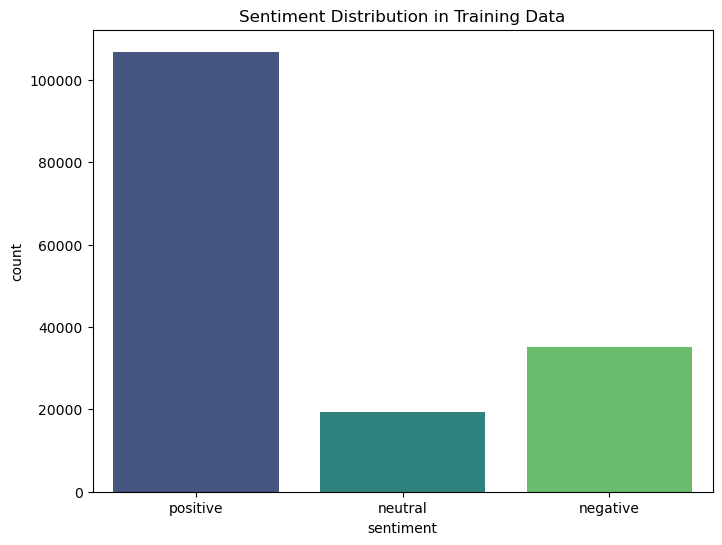

In [24]:
plt.figure(figsize=(8, 6))
sns.countplot(data=train_data, x='sentiment', order=['positive', 'neutral', 'negative'], palette='viridis')
plt.title("Sentiment Distribution in Training Data")
plt.show()

**plot rating distribution**

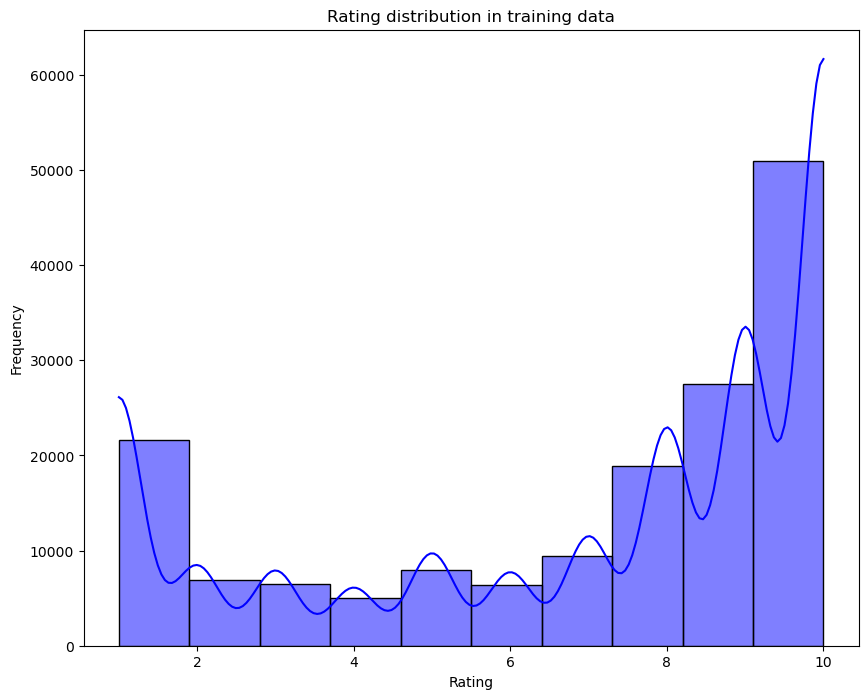

In [27]:
plt.figure(figsize=(10,8))
sns.histplot(train_data['rating'],bins=10,kde=True,color='blue')
plt.title("Rating distribution in training data")
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

**word count analysis**

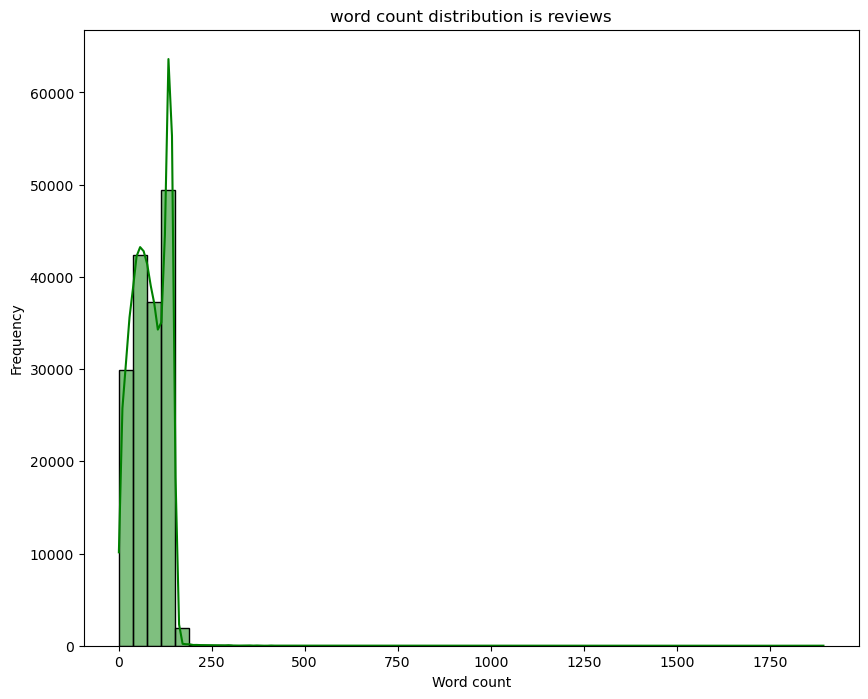

In [30]:
train_data['word_count'] = train_data['review'].apply(lambda x: len(str(x).split()))
plt.figure(figsize=(10,8))
sns.histplot(train_data['word_count'],bins=50,kde=True,color='green')
plt.title('word count distribution is reviews')
plt.xlabel("Word count")
plt.ylabel('Frequency')
plt.show()

# Text Vectorization with TF-IDF


**initializing the tf-idf vectorizer**

In [33]:
tfidf = TfidfVectorizer(max_features=5000,stop_words='english')

**fit and transform review text**

In [36]:
X_train_tfidf = tfidf.fit_transform(train_data['review'])
X_test_tfidf = tfidf.transform(test_data['review'])

**extract target labels**

In [39]:
y_train = train_data['sentiment']
y_test = test_data['sentiment']

# Model Training

C:\Users\aumpa\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logisitic Regression
Model performance for Training set
- Accuracy: 0.7893
- F1 score: 0.7617
----------------------------------
Model performance for Test set
- Accuracy: 0.7726
- F1 score: 0.7435

Classification Report:
              precision    recall  f1-score   support

    negative       0.68      0.66      0.67     11838
     neutral       0.42      0.13      0.20      6488
    positive       0.82      0.93      0.87     35440

    accuracy                           0.77     53766
   macro avg       0.64      0.57      0.58     53766
weighted avg       0.74      0.77      0.74     53766



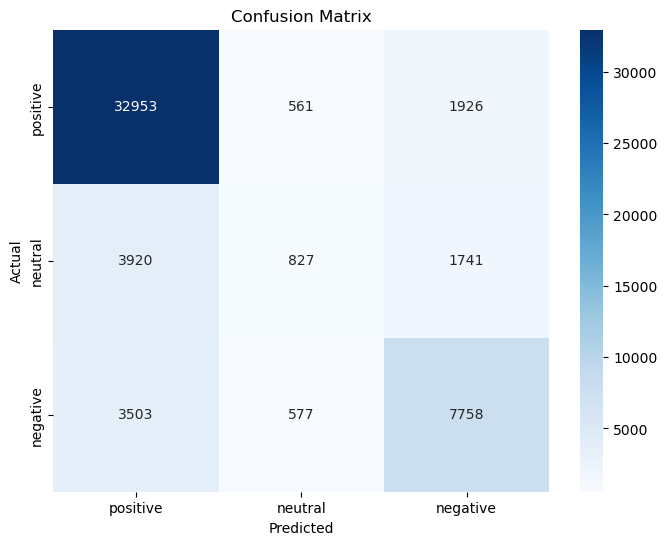



Decision Tree
Model performance for Training set
- Accuracy: 0.9995
- F1 score: 0.9995
----------------------------------
Model performance for Test set
- Accuracy: 0.8487
- F1 score: 0.8480

Classification Report:
              precision    recall  f1-score   support

    negative       0.77      0.77      0.77     11838
     neutral       0.70      0.66      0.68      6488
    positive       0.90      0.91      0.90     35440

    accuracy                           0.85     53766
   macro avg       0.79      0.78      0.79     53766
weighted avg       0.85      0.85      0.85     53766



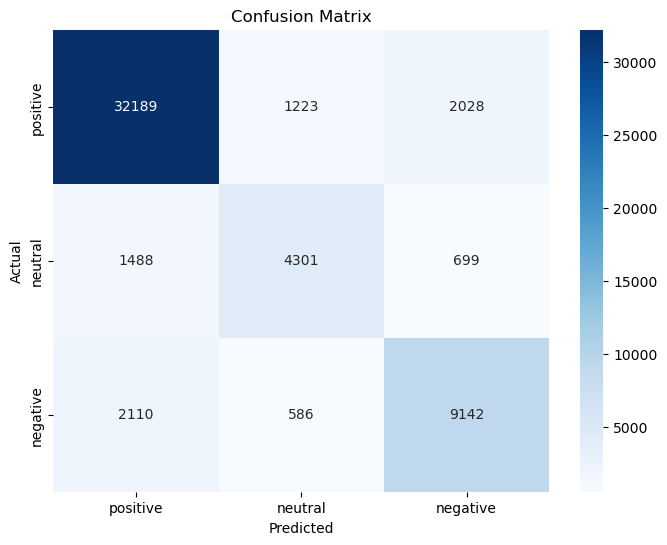



Random Forest
Model performance for Training set
- Accuracy: 0.9995
- F1 score: 0.9995
----------------------------------
Model performance for Test set
- Accuracy: 0.8924
- F1 score: 0.8864

Classification Report:
              precision    recall  f1-score   support

    negative       0.93      0.76      0.83     11838
     neutral       1.00      0.61      0.75      6488
    positive       0.87      0.99      0.93     35440

    accuracy                           0.89     53766
   macro avg       0.93      0.78      0.84     53766
weighted avg       0.90      0.89      0.89     53766



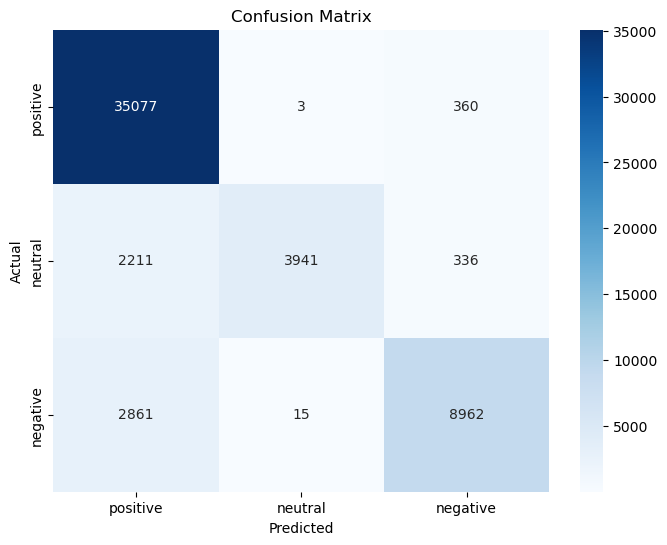



Gradient Boost
Model performance for Training set
- Accuracy: 0.7099
- F1 score: 0.6308
----------------------------------
Model performance for Test set
- Accuracy: 0.7038
- F1 score: 0.6225

Classification Report:
              precision    recall  f1-score   support

    negative       0.73      0.24      0.36     11838
     neutral       0.54      0.01      0.01      6488
    positive       0.70      0.99      0.82     35440

    accuracy                           0.70     53766
   macro avg       0.66      0.41      0.40     53766
weighted avg       0.69      0.70      0.62     53766



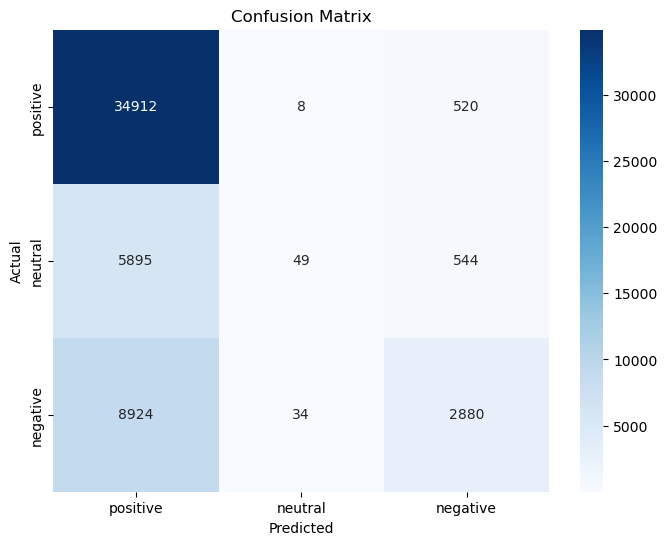

C:\Users\aumpa\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Adaboost
Model performance for Training set
- Accuracy: 0.7102
- F1 score: 0.6492
----------------------------------
Model performance for Test set
- Accuracy: 0.7066
- F1 score: 0.6453

Classification Report:
              precision    recall  f1-score   support

    negative       0.57      0.39      0.46     11838
     neutral       0.42      0.00      0.01      6488
    positive       0.73      0.94      0.82     35440

    accuracy                           0.71     53766
   macro avg       0.58      0.45      0.43     53766
weighted avg       0.66      0.71      0.65     53766



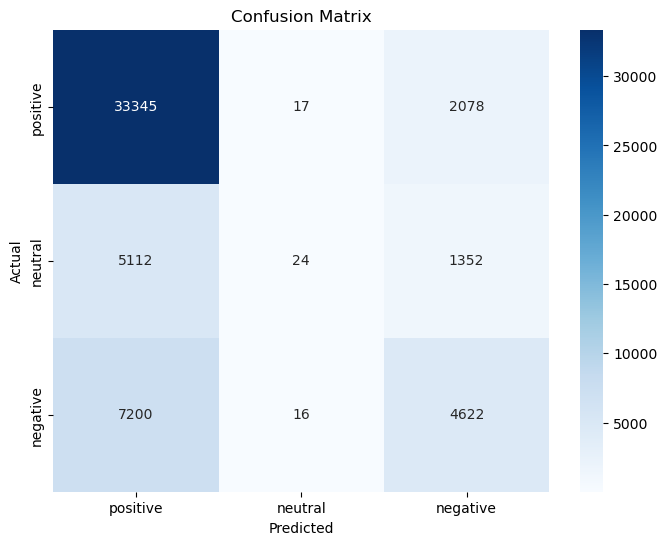

In [50]:
models={
    "Logisitic Regression":LogisticRegression(),
    "Decision Tree":DecisionTreeClassifier(),
    "Random Forest":RandomForestClassifier(),
    "Gradient Boost":GradientBoostingClassifier(),
    "Adaboost":AdaBoostClassifier()
}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train_tfidf, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train_tfidf)
    y_test_pred = model.predict(X_test_tfidf)

    # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score


    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score


    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))
    

    
    
    print('----------------------------------')
    
    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print("\nClassification Report:")
    print(classification_report(y_test, y_test_pred))
    cm = confusion_matrix(y_test, y_test_pred, labels=['positive', 'neutral', 'negative'])

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['positive', 'neutral', 'negative'], yticklabels=['positive', 'neutral', 'negative'])
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
    
    print('='*35)
    print('\n')

**random forest gives the highest accuracy**

In [54]:
model = RandomForestClassifier()
model.fit(X_train_tfidf, y_train)
y_pred = model.predict(X_test_tfidf)

**model evaluation**

Accuracy: 0.8915

Classification Report:
              precision    recall  f1-score   support

    negative       0.93      0.75      0.83     11838
     neutral       1.00      0.61      0.75      6488
    positive       0.87      0.99      0.93     35440

    accuracy                           0.89     53766
   macro avg       0.93      0.78      0.84     53766
weighted avg       0.90      0.89      0.89     53766



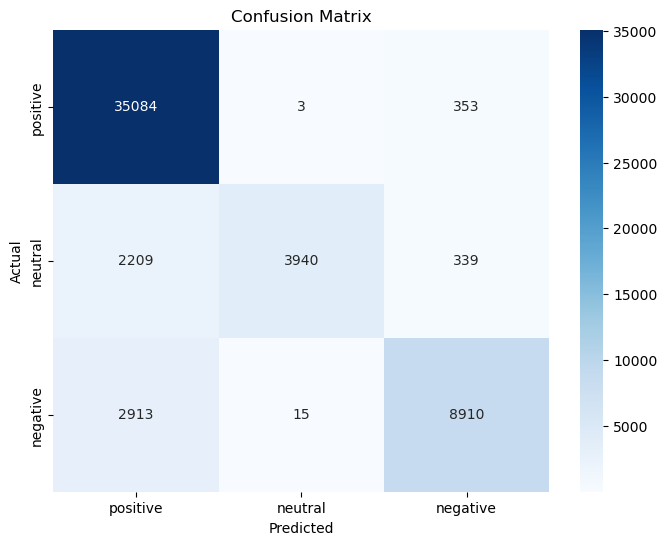

In [56]:
# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=['positive', 'neutral', 'negative'])

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['positive', 'neutral', 'negative'], yticklabels=['positive', 'neutral', 'negative'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Prediction

**Test sample predictions**

In [61]:
sample_reviews = [
    "This drug worked wonders for my condition!",
    "The side effects were unbearable.",
    "It had a mild effect, nothing remarkable."
]
# Transform sample reviews using TF-IDF
sample_tfidf = tfidf.transform(sample_reviews)

# Predict sentiments
sample_predictions = model.predict(sample_tfidf)

# Display predictions
for review, sentiment in zip(sample_reviews, sample_predictions):
    print(f"Review: {review}\nPredicted Sentiment: {sentiment}\n")

Review: This drug worked wonders for my condition!
Predicted Sentiment: positive

Review: The side effects were unbearable.
Predicted Sentiment: positive

Review: It had a mild effect, nothing remarkable.
Predicted Sentiment: neutral

